## Import relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load and clean data

In [2]:
details=pd.read_excel('Sample details.xlsx',header=4,usecols='C:H')
M={'/':'_'}
details['Sample number']=["".join([M.get(c,c) for c in STR]) for STR in details['Sample number']]

In [3]:
#Load n Clean xrf
xrf=pd.read_excel('whole rock data(1).xlsx',header=5)
xrf.dropna(axis=0,how='all',inplace=True)
xrf.dropna(axis=1,how='all',inplace=True)
xrf.drop(0,inplace=True)
xrf.drop('Unnamed: 16',axis=1,inplace=True)
xrf.fillna(method='ffill',inplace=True)
xrf.rename(columns={'Sample ':'Sample'},inplace=True)
M={'/':'_'}
xrf['Sample']=["".join([M.get(c,c) for c in STR]) for STR in xrf['Sample']]

In [4]:
xrfte=pd.read_excel('whole rock data(1).xlsx',sheet_name='trace elements',header=5)
xrfte.drop('Unnamed: 21',axis=1,inplace=True)
xrfte.dropna(how='all',axis=0,inplace=True)
xrfte.dropna(how='all',axis=1,inplace=True)
xrfte.drop(0,inplace=True)
xrfte[xrfte=='n.d.']=np.nan
xrfte.rename(columns={'Unnamed: 0':'Sample'},inplace=True)
xrfte['Sample'].fillna(method='ffill',inplace=True)
xrfte['Sample']=["".join([M.get(c,c) for c in STR]) for STR in xrfte['Sample']]
xrfte.fillna(0,inplace=True)

In [5]:
#Normalise to actual total
tots=xrf[xrf.columns[1:11]].sum(axis=1).to_numpy()
xrfc=pd.DataFrame().reindex_like(xrf)
for i in range(len(xrf)):
    xrfc.iloc[i,1:11]=(xrf.iloc[i,1:11]/tots[i])*100
xrfc['Sample']=xrf['Sample']
xrfc.dropna(how='all',axis=1,inplace=True)

In [6]:
xrfc=xrfc.join(xrfte.set_index('Sample'),on='Sample')
xrfc['Eruption']=[details[details['Sample number']==i]['Source'].tolist()[0] for i in xrfc['Sample']]

In [7]:
xrf_means=xrfc.groupby('Sample').mean()

In [8]:
def clean_epma(sample,number): #fillna? not sure if i should... also zinc :\
    sample.dropna(thresh=2,axis=1,inplace=True)
    sample.dropna(thresh=2,axis=0,inplace=True)
    sample.rename(columns={sample.columns[-2]:'Comment',sample.columns[-1]:'Geoff notes'},inplace=True)
    sample.index=np.arange(len(sample))
    sample['Sample']=[number]*len(sample)

In [9]:
epma_18_5=pd.read_excel('EPMA 2018 Data.xlsx',sheet_name='1516_5',header=4,index_col=0)
clean_epma(epma_18_5,'1516_5')

In [10]:
epma_18_3=pd.read_excel('EPMA 2018 Data.xlsx',sheet_name='1516_3',header=4,index_col=0)
clean_epma(epma_18_3,'1516_3')

In [11]:
epma_18_6=pd.read_excel('EPMA 2018 Data.xlsx',sheet_name='1516_6',header=4,index_col=0)
clean_epma(epma_18_6,'1516_6')

In [12]:
epma_18_8=pd.read_excel('EPMA 2018 Data.xlsx',sheet_name='1516_8',header=4,index_col=0)
clean_epma(epma_18_8,'1516_8')

In [13]:
epma_20_3=pd.read_excel('EPMA 2020 Data.xlsx',sheet_name='1516_3',header=5,index_col=0)
clean_epma(epma_20_3,'1516_3')

In [14]:
epma_20_8=pd.read_excel('EPMA 2020 Data.xlsx',sheet_name='1516_8',header=5,index_col=0)
clean_epma(epma_20_8,'1516_8')

In [15]:
epma_20_5=pd.read_excel('EPMA 2020 Data.xlsx',sheet_name='1516_5',header=5,index_col=0)
clean_epma(epma_20_5,'1516_5')

In [16]:
epma_20_6=pd.read_excel('EPMA 2020 Data.xlsx',sheet_name='1516_6',header=5,index_col=0)
clean_epma(epma_20_6,'1516_6')

In [17]:
epma_19_6=pd.read_excel('EPMA 2019 Data.xlsx',sheet_name='1516_6',header=5,index_col=0)
clean_epma(epma_19_6,'1516_6')

In [18]:
epma_19_5=pd.read_excel('EPMA 2019 Data.xlsx',sheet_name='1516_5',header=5,index_col=0)
clean_epma(epma_19_5,'1516_5')

In [19]:
epma_19_1=pd.read_excel('EPMA 2019 Data.xlsx',sheet_name='1516_1',header=5,index_col=0)
clean_epma(epma_19_1,'1516_1')

In [20]:
epma_19_3=pd.read_excel('EPMA 2019 Data.xlsx',sheet_name='1516_3',header=6,index_col=0)
clean_epma(epma_19_3,'1516_3')

In [21]:
epma_19_8=pd.read_excel('EPMA 2019 Data.xlsx',sheet_name='1516_8',header=5,index_col=0)
clean_epma(epma_19_8,'1516_8')

In [22]:
epma_19_11=pd.read_excel('EPMA 2019 Data.xlsx',sheet_name='1516_11',header=5,index_col=0)
clean_epma(epma_19_11,'1516_11')

## Assemble DataFrame

In [23]:
dfs=[epma_18_3,epma_18_6,epma_18_8,epma_20_3,epma_20_5,epma_20_6,epma_20_8,epma_19_1,epma_19_3,epma_19_5,epma_19_6,epma_19_8,epma_19_11]
for i in dfs:
    epma_18_5=epma_18_5.append(i)
all_data=epma_18_5
#all_data['Comment'].fillna(all_data['Comment from probe session'],inplace=True)
#del all_data['Comment from probe session']
all_data.fillna(0,inplace=True)
all_data.index=np.arange(len(all_data))

In [24]:
#Add column: 'Mineral'
all_data['Mineral']=np.zeros_like(all_data['SiO2'])

mask=(all_data['Geoff notes'].str.lower().str.contains('x',na=False) | all_data['Comment'].str.lower().str.contains('x',na=False))
all_data['Mineral']=np.where(mask,'Clinopyroxene',all_data['Mineral'])

mask=(all_data['Geoff notes'].str.lower().str.contains('plag',na=False) | all_data['Comment'].str.lower().str.contains('plag',na=False))
all_data['Mineral']=np.where(mask,'Plagioclase',all_data['Mineral'])

mask=(all_data['Geoff notes'].str.lower().str.contains('sp',na=False) | all_data['Comment'].str.lower().str.contains('sp',na=False))
all_data['Mineral']=np.where(mask,'Spinel',all_data['Mineral'])

## Create useful sub-dataframes

In [25]:
color_dict={'1516_3': 'blue', '1516_5': 'orange', '1516_6': 'green', '1516_8': 'red','1516_1':'cyan','1516_11':'magenta'}
mineral_dict={'Plagioclase':'blue','Clinopyroxene':'orange','Spinel':'green'}
eruption_dict={'Fissure':'blue','Volcano':'orange'}

In [26]:
details['Sample number']=['1516_1','1516_2','1516_3','1516_4','1516_5','1516_6','1516_7','1516_8','1516_9','1516_10','1516_11','1516_12']
eruptions_nested_list=[details[details['Sample number']==i]['Source'].tolist() for i in all_data['Sample']]
all_data['Eruption']=[i for j in eruptions_nested_list for i in j]

In [27]:
plag=all_data[all_data['Mineral']=='Plagioclase']
cpx=all_data[all_data['Mineral']=='Clinopyroxene']

#remove misidentified ones
not_cpx=all_data[all_data['Geoff notes'].str.contains('not',na=False)]['Comment'].unique()
for i in not_cpx:
    cpx=cpx[cpx['Comment']!=i]

In [28]:
#transects
transect_comments=all_data['Comment'].value_counts()>=6
transect_counts=all_data['Comment'].value_counts()[transect_comments]
uniques=all_data['Comment'].unique()
transects=pd.DataFrame()
for i in uniques:
    if i in transect_counts:
        transects=transects.append(all_data[all_data['Comment']==i])

In [29]:
#remove mistakes
not_transects=['Section 11 Groundmass plagioclase','1. Plag rim to rim','Phenocryst 2 core','Phenocryst 3 core',
               'Phenocryst 4 core','Phenocryst 5 core','Phenocryst 7 core','Phenocryst 8 core',
               'IS/16-5 Plag phenocryst 4 core','sample 6 groundmass core','Groundmass Core Sample 8','Phenocryst 7 rim']
for i in not_transects:
    transects=transects[transects['Comment']!=i]

In [30]:
#add distance columns to transects

#distance as a fraction
frac_dist_arrays=[np.linspace(0,1,len(transects[transects['Comment']==i])) for i in transects['Comment'].unique()]
transects['frac_dist']=[i for j in frac_dist_arrays for i in j]

#distance as an integer
ab_dist_arrays=[np.arange(len(transects[transects['Comment']==i])) for i in transects['Comment'].unique()]
transects['ab_dist']=[i for j in ab_dist_arrays for i in j]

In [31]:
#Plagioclase transecs
plag_transects=transects[transects['Mineral']=='Plagioclase']

In [32]:
mask=all_data['Comment'].str.lower().str.contains('ground',na=False)
gmass=all_data[mask]
gmass.index=np.arange(len(gmass))

In [33]:
g_plag=gmass[gmass['Mineral']=='Plagioclase']

In [34]:
samples=['1516_3','1516_5','1516_6','1516_8']

In [35]:
all_pcrysts=plag_transects.append(plag[plag['Comment'].str.contains('cryst',na=False)])

In [36]:
psect_cores=plag_transects[plag_transects['frac_dist']==0]

In [37]:
mask=(plag['Comment'].str.lower().str.contains('ground',na=False) | 
      plag['Comment'].str.lower().str.contains('rim',na=False) | 
      plag['Geoff notes'].str.lower().str.contains('rim',na=False))
pcrysts=plag[~mask]
pcrysts.index=np.arange(len(pcrysts))

mask=(cpx['Comment'].str.lower().str.contains('ground',na=False) | 
      cpx['Comment'].str.lower().str.contains('rim',na=False) | 
      cpx['Geoff notes'].str.lower().str.contains('rim',na=False))
xcrysts=cpx[~mask]
xcrysts.index=np.arange(len(xcrysts))

## Define useful functions

In [38]:
def trendline(x,y,z,a):
    m,c,_,_,_=stats.linregress(x,y)
    return plt.plot(x,m*np.array(x)+c,c=z,label=a)

## Results

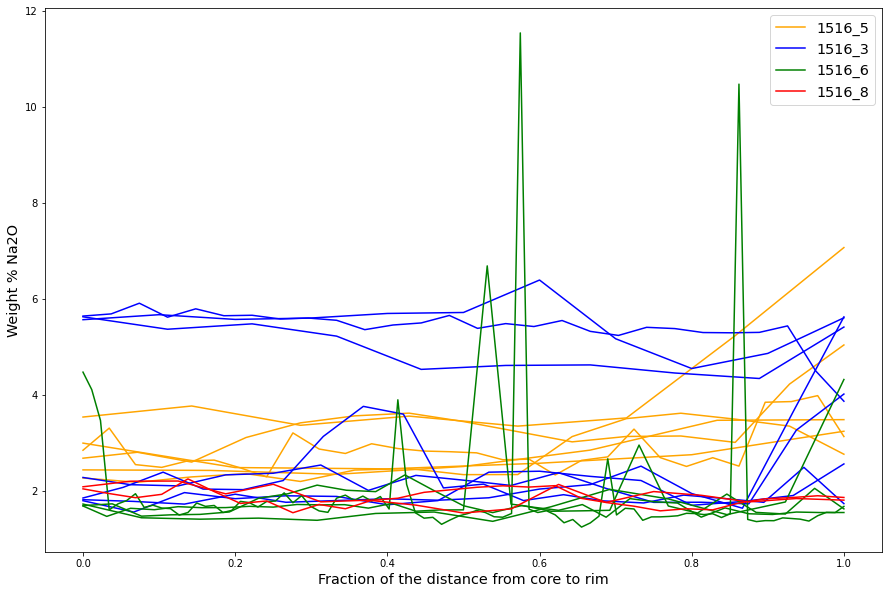

In [39]:
#Raw transect data
plt.figure(figsize=(15,10))
for i in plag_transects['Sample'].unique():
    sample=plag_transects[plag_transects['Sample']==i]
    for j in sample['Comment'].unique():
        sect=sample[sample['Comment']==j]
        x=sect['frac_dist']
        y=sect['Na2O']
        if j==sample['Comment'].unique()[0]:
            plt.plot(x,y,c=color_dict[i],label=i)
        else:
            plt.plot(x,y,c=color_dict[i])
plt.xlabel('Fraction of the distance from core to rim',fontsize='x-large')
plt.ylabel('Weight % Na2O',fontsize='x-large')
plt.legend(fontsize='x-large')

C:\Users\Public\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\Public\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Public\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
C:\Users\Public\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\Public\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Public\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.

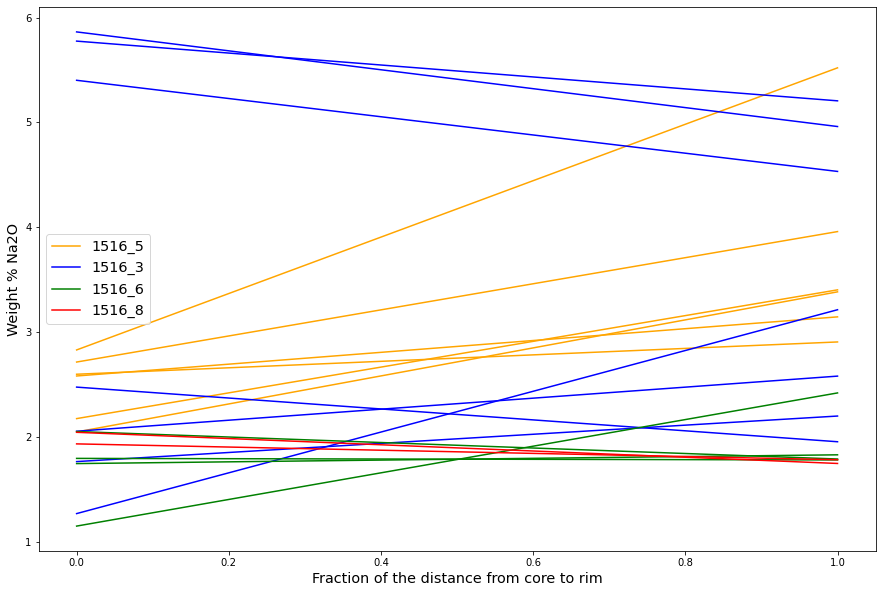

In [40]:
plt.figure(figsize=(15,10))
for i in plag_transects['Sample'].unique():
    sample=plag_transects[plag_transects['Sample']==i]
    for j in sample['Comment'].unique():
        sect=sample[sample['Comment']==j]
        x=sect['frac_dist'].tolist()
        y=sect['Na2O'].tolist()
        if j==sample['Comment'].unique()[0]:
            trendline(x,y,z=color_dict[i],a=i)
        else:
            trendline(x,y,z=color_dict[i],a=None)
plt.xlabel('Fraction of the distance from core to rim',fontsize='x-large')
plt.ylabel('Weight % Na2O',fontsize='x-large')
plt.legend(fontsize='x-large')

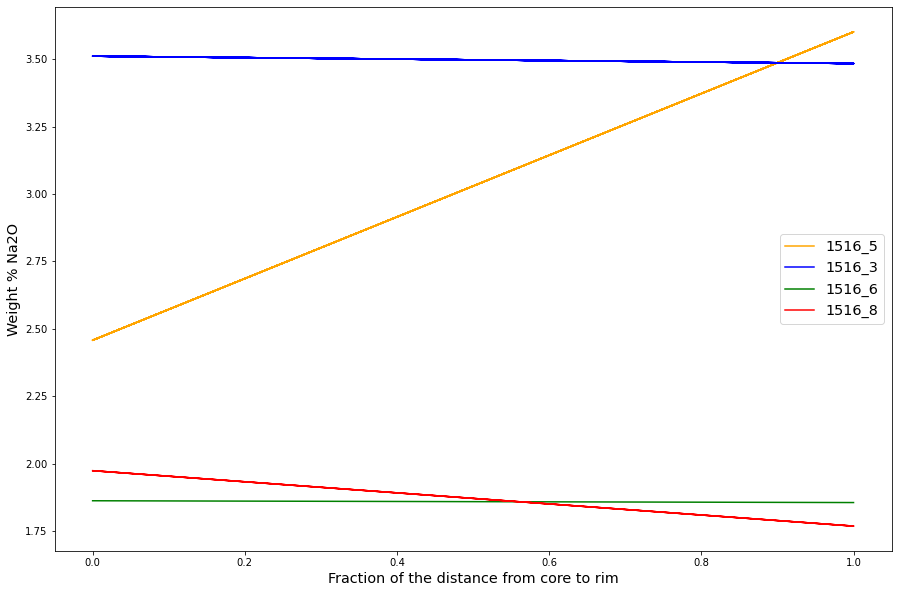

In [41]:
plt.figure(figsize=(15,10))
for i in plag_transects['Sample'].unique():
    sample=plag_transects[plag_transects['Sample']==i]
    x=sample['frac_dist'].tolist()
    y=sample['Na2O'].tolist()
    trendline(x,y,z=color_dict[i],a=i)
plt.xlabel('Fraction of the distance from core to rim',fontsize='x-large')
plt.ylabel('Weight % Na2O',fontsize='x-large')
plt.legend(fontsize='x-large')

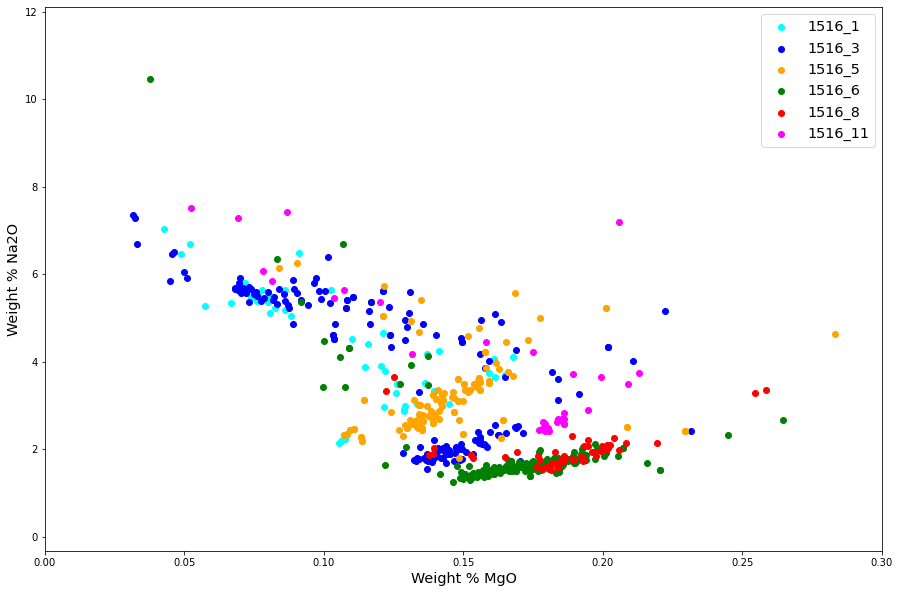

In [42]:
plt.figure(figsize=(15,10))
for i in ['1516_1','1516_3','1516_5','1516_6','1516_8','1516_11']:
    sample=all_pcrysts[all_pcrysts['Sample']==i]
    plt.scatter(sample['MgO'],sample['Na2O'],c=color_dict[i],label=i)
plt.xlabel('Weight % MgO',fontsize='x-large')
plt.ylabel('Weight % Na2O',fontsize='x-large')
plt.xlim(0,.3)
plt.legend(fontsize='x-large')

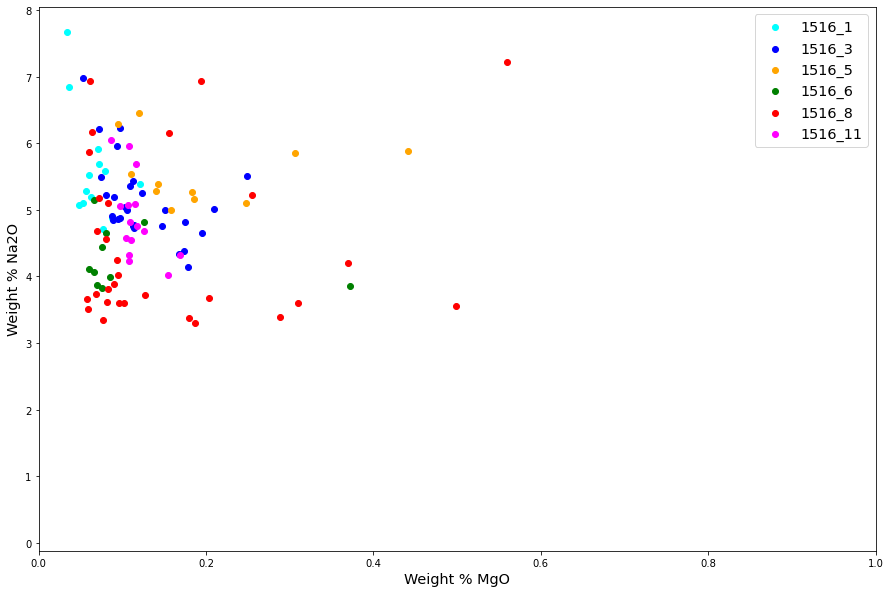

In [43]:
plt.figure(figsize=(15,10))
for i in ['1516_1','1516_3','1516_5','1516_6','1516_8','1516_11']:
    sample=g_plag[g_plag['Sample']==i]
    plt.scatter(sample['MgO'],sample['Na2O'],c=color_dict[i],label=i)
plt.xlabel('Weight % MgO',fontsize='x-large')
plt.ylabel('Weight % Na2O',fontsize='x-large')
plt.xlim(0,1)
plt.legend(fontsize='x-large')

Text(0, 0.5, 'Weight % Al2O3')

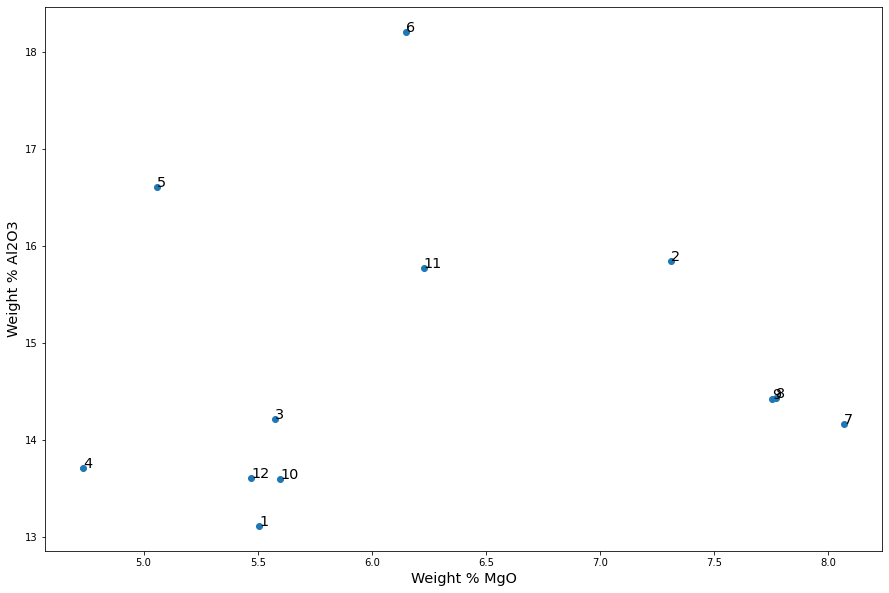

In [44]:
all_samples=['1516_1', '1516_2', '1516_3', '1516_4','1516_5', '1516_6', '1516_7', '1516_8', 
             '1516_9','1516_10', '1516_11', '1516_12']
plt.figure(figsize=(15,10))
plt.scatter(xrf_means['MgO'],xrf_means['Al2O3'])
for i in range(12):
    plt.text(xrf_means.loc[all_samples[i],'MgO'],xrf_means.loc[all_samples[i],'Al2O3'],str(i+1),fontsize='x-large')
plt.xlabel('Weight % MgO',fontsize='x-large')
plt.ylabel('Weight % Al2O3',fontsize='x-large')

In [55]:
print('Avg plag MgO = '+str(pcrysts['MgO'].mean()))
print('Avg plag AL2O3 = '+str(pcrysts['Al2O3'].mean()))
print('Avg cpx MgO = '+str(xcrysts['MgO'].mean()))
print('Avg cpx Al2O3 = '+str(xcrysts['Al2O3'].mean()))

Avg plag MgO = 0.3639004484304933
Avg plag AL2O3 = 30.095021076233184
Avg cpx MgO = 15.548603703703705
Avg cpx Al2O3 = 4.1842


## Discussion

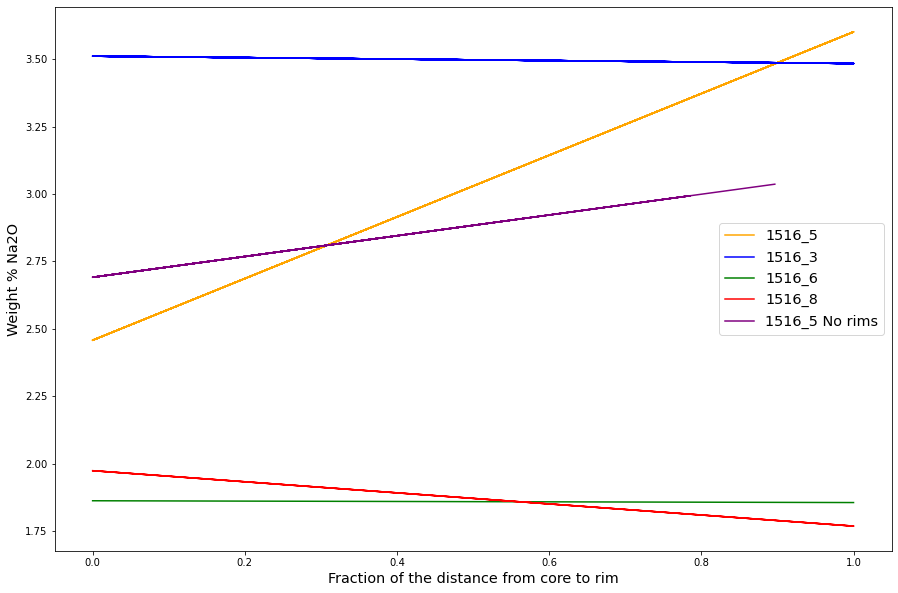

In [45]:
trans5=plag_transects[plag_transects['Sample']=='1516_5']
trans5_comments=trans5['Comment'].unique()
trans5_exrims=pd.DataFrame()
for i in trans5_comments:
    trans5_exrims=trans5_exrims.append(trans5[trans5['Comment']==i][:-3])

plt.figure(figsize=(15,10))
for i in plag_transects['Sample'].unique():
    sample=plag_transects[plag_transects['Sample']==i]
    x=sample['frac_dist'].tolist()
    y=sample['Na2O'].tolist()
    trendline(x,y,z=color_dict[i],a=i)
x=trans5_exrims['frac_dist'].tolist()
y=trans5_exrims['Na2O'].tolist()
trendline(x,y,z='purple',a='1516_5 No rims')
plt.xlabel('Fraction of the distance from core to rim',fontsize='x-large')
plt.ylabel('Weight % Na2O',fontsize='x-large')
plt.legend(fontsize='x-large')

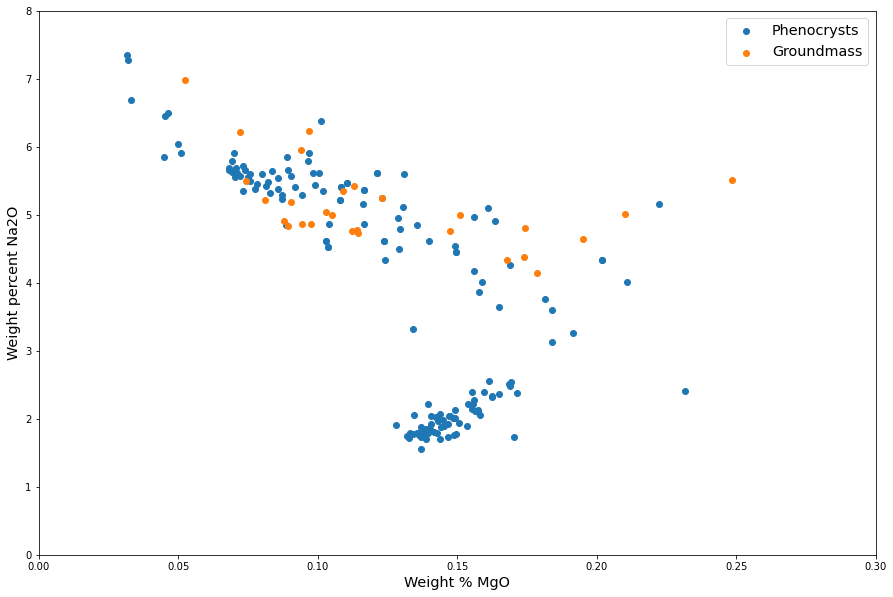

In [47]:
plt.figure(figsize=(15,10))
i='1516_3'
sample=all_pcrysts[all_pcrysts['Sample']==i]
plt.scatter(sample['MgO'],sample['Na2O'],label='Phenocrysts')  

g_sample=g_plag[g_plag['Sample']==i]
plt.scatter(g_sample['MgO'],g_sample['Na2O'],label='Groundmass')
    
plt.xlim(0,.3)
plt.ylim(0,8)
plt.xlabel('Weight % MgO',fontsize='x-large')
plt.ylabel('Weight percent Na2O',size='x-large')
plt.legend(fontsize='x-large')

Text(0, 0.5, 'Weight % Al2O3')

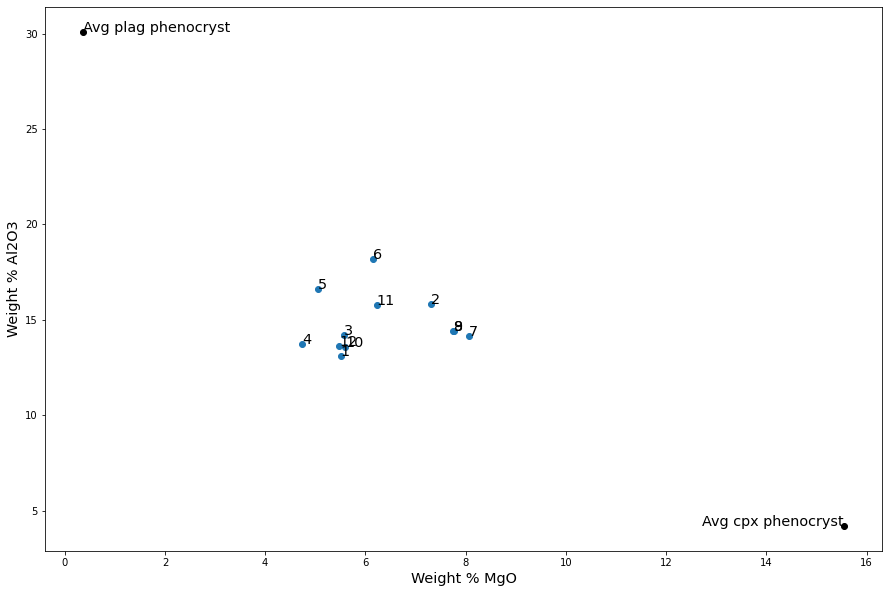

In [48]:
plt.figure(figsize=(15,10))
plt.scatter(xrf_means['MgO'],xrf_means['Al2O3'])
for i in range(12):
    plt.text(xrf_means.loc[all_samples[i],'MgO'],xrf_means.loc[all_samples[i],'Al2O3'],str(i+1),fontsize='x-large')
    
plt.scatter(pcrysts['MgO'].mean(),pcrysts['Al2O3'].mean(),c='black')
plt.text(pcrysts['MgO'].mean(),pcrysts['Al2O3'].mean(),'Avg plag phenocryst',fontsize='x-large')

plt.scatter(xcrysts['MgO'].mean(),xcrysts['Al2O3'].mean(),c='black')
plt.text(xcrysts['MgO'].mean(),xcrysts['Al2O3'].mean(),'Avg cpx phenocryst',fontsize='x-large',ha='right')
    
    

plt.xlabel('Weight % MgO',fontsize='x-large')
plt.ylabel('Weight % Al2O3',fontsize='x-large')

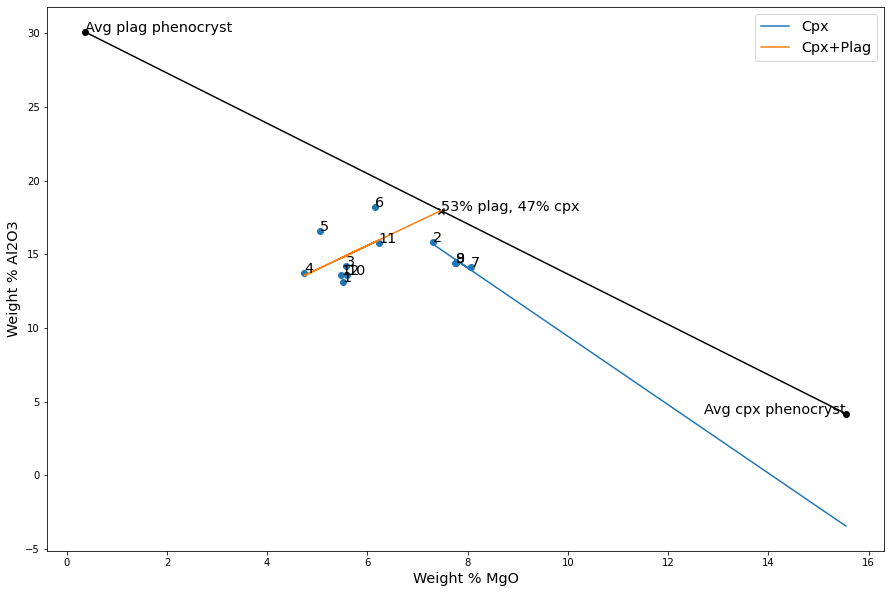

In [49]:
plt.figure(figsize=(15,10))
plt.scatter(xrf_means['MgO'],xrf_means['Al2O3'])
for i in range(12):
    plt.text(xrf_means.loc[all_samples[i],'MgO'],xrf_means.loc[all_samples[i],'Al2O3'],str(i+1),fontsize='x-large')
    
plt.scatter(pcrysts['MgO'].mean(),pcrysts['Al2O3'].mean(),c='black')
plt.text(pcrysts['MgO'].mean(),pcrysts['Al2O3'].mean(),'Avg plag phenocryst',fontsize='x-large')

plt.scatter(xcrysts['MgO'].mean(),xcrysts['Al2O3'].mean(),c='black')
plt.text(xcrysts['MgO'].mean(),xcrysts['Al2O3'].mean(),'Avg cpx phenocryst',ha='right',fontsize='x-large')

#Cpx
x=xrf_means.loc[['1516_2','1516_7','1516_8','1516_9'],'MgO']
y=xrf_means.loc[['1516_2','1516_7','1516_8','1516_9'],'Al2O3']
#trendline(x,y,z='blue',a='456')
result=stats.linregress(x,y)
x=np.array(x.tolist()+[xcrysts['MgO'].mean()])
plt.plot(x,(result.slope*x)+result.intercept,label='Cpx')

#plt.scatter(xcrysts['MgO'].mean(),(result.slope*xcrysts['MgO'].mean())+result.intercept,marker='x',c='black')
#plt.text(xcrysts['MgO'].mean(),(result.slope*xcrysts['MgO'].mean())+result.intercept,'Cpx',fontsize='x-large')

plt.plot([pcrysts['MgO'].mean(),xcrysts['MgO'].mean()],[pcrysts['Al2O3'].mean(),xcrysts['Al2O3'].mean()],c='black')


#Mix
x=xrf_means.loc[['1516_1','1516_3','1516_6','1516_5','1516_4','1516_10','1516_11','1516_12'],'MgO']
y=xrf_means.loc[['1516_1','1516_3','1516_6','1516_5','1516_4','1516_10','1516_11','1516_12'],'Al2O3']
#trendline(x,y,z='blue',a='456')
result1=stats.linregress(x,y)
#x=np.array(x.tolist()+[])


#Intersection
result2=stats.linregress([pcrysts['MgO'].mean(),xcrysts['MgO'].mean()],[pcrysts['Al2O3'].mean(),xcrysts['Al2O3'].mean()])
intersect=(result1.intercept-result2.intercept)/(result2.slope-result1.slope)
plt.scatter(intersect,(result1.slope*intersect)+result1.intercept,marker='x',c='black')

pct=round(((xcrysts['MgO'].mean()-intersect)/(xcrysts['MgO'].mean()-pcrysts['MgO'].mean()))*100)
plt.text(intersect,(result1.slope*intersect)+result1.intercept,str(pct)+'% plag, '+str(100-pct)+'% cpx',fontsize='x-large')

x=np.array(x.tolist()+[intersect])
plt.plot(x,(result1.slope*x)+result1.intercept,label='Cpx+Plag')
    
plt.xlabel('Weight % MgO',fontsize='x-large')
plt.ylabel('Weight % Al2O3',fontsize='x-large')

plt.legend(fontsize='x-large')

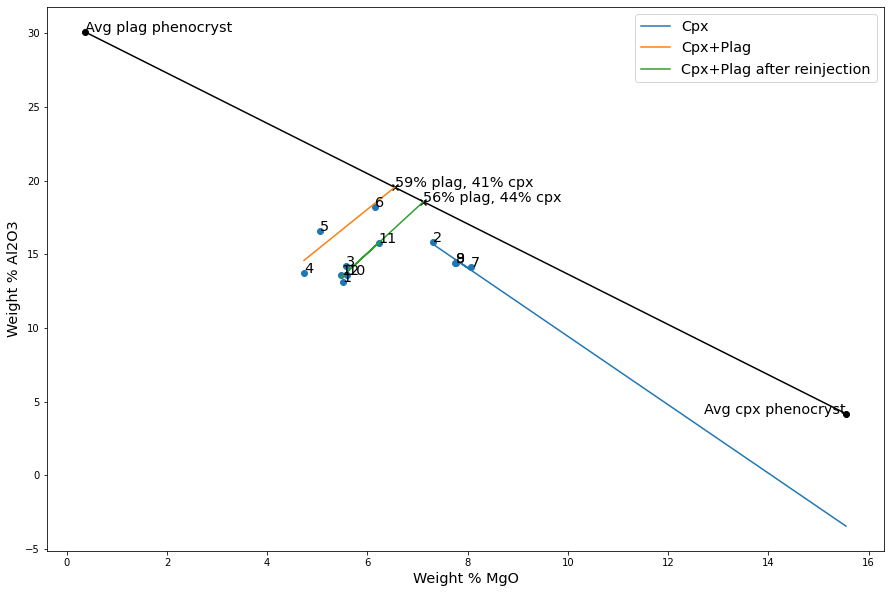

In [50]:
plt.figure(figsize=(15,10))
plt.scatter(xrf_means['MgO'],xrf_means['Al2O3'])
for i in range(12):
    plt.text(xrf_means.loc[all_samples[i],'MgO'],xrf_means.loc[all_samples[i],'Al2O3'],str(i+1),fontsize='x-large')
    
plt.scatter(pcrysts['MgO'].mean(),pcrysts['Al2O3'].mean(),c='black')
plt.text(pcrysts['MgO'].mean(),pcrysts['Al2O3'].mean(),'Avg plag phenocryst',fontsize='x-large')

plt.scatter(xcrysts['MgO'].mean(),xcrysts['Al2O3'].mean(),c='black')
plt.text(xcrysts['MgO'].mean(),xcrysts['Al2O3'].mean(),'Avg cpx phenocryst',fontsize='x-large',ha='right')
    
#cpx line
x=xrf_means.loc[['1516_2','1516_7','1516_8','1516_9'],'MgO']
y=xrf_means.loc[['1516_2','1516_7','1516_8','1516_9'],'Al2O3']
result=stats.linregress(x,y)
x=np.array(x.tolist()+[xcrysts['MgO'].mean()])
plt.plot(x,(result.slope*x)+result.intercept,label='Cpx')
#plt.scatter(xcrysts['MgO'].mean(),(result.slope*xcrysts['MgO'].mean())+result.intercept,marker='x',c='black')
#plt.text(xcrysts['MgO'].mean(),(result.slope*xcrysts['MgO'].mean())+result.intercept,'Cpx',fontsize='x-large')


plt.plot([pcrysts['MgO'].mean(),xcrysts['MgO'].mean()],[pcrysts['Al2O3'].mean(),xcrysts['Al2O3'].mean()],c='black')

#First line
x=xrf_means.loc[['1516_4','1516_5','1516_6'],'MgO']
y=xrf_means.loc[['1516_4','1516_5','1516_6'],'Al2O3']
result1=stats.linregress(x,y)

#Calculate intersection point
result2=stats.linregress([pcrysts['MgO'].mean(),xcrysts['MgO'].mean()],[pcrysts['Al2O3'].mean(),xcrysts['Al2O3'].mean()])
intersect=(result1.intercept-result2.intercept)/(result2.slope-result1.slope)
plt.scatter(intersect,(result1.slope*intersect)+result1.intercept,marker='x',c='black')

pct=round(((xcrysts['MgO'].mean()-intersect)/(xcrysts['MgO'].mean()-pcrysts['MgO'].mean()))*100)
plt.text(intersect,(result1.slope*intersect)+result1.intercept,str(pct)+'% plag, '+str(100-pct)+'% cpx',fontsize='x-large')

x=np.array(x.tolist()+[intersect])
plt.plot(x,(result1.slope*x)+result1.intercept,label='Cpx+Plag')

#Second line
x=xrf_means.loc[['1516_1','1516_3','1516_10','1516_11','1516_12'],'MgO']
y=xrf_means.loc[['1516_1','1516_3','1516_10','1516_11','1516_12'],'Al2O3']
result1=stats.linregress(x,y)

#Calculate intersection point
result2=stats.linregress([pcrysts['MgO'].mean(),xcrysts['MgO'].mean()],[pcrysts['Al2O3'].mean(),xcrysts['Al2O3'].mean()])
intersect=(result1.intercept-result2.intercept)/(result2.slope-result1.slope)
plt.scatter(intersect,(result1.slope*intersect)+result1.intercept,marker='x',c='black')

pct=round(((xcrysts['MgO'].mean()-intersect)/(xcrysts['MgO'].mean()-pcrysts['MgO'].mean()))*100)
plt.text(intersect,(result1.slope*intersect)+result1.intercept,str(pct)+'% plag, '+str(100-pct)+'% cpx',fontsize='x-large')

x=np.array(x.tolist()+[intersect])
plt.plot(x,(result1.slope*x)+result1.intercept,label='Cpx+Plag after reinjection')
    
plt.xlabel('Weight % MgO',fontsize='x-large')
plt.ylabel('Weight % Al2O3',fontsize='x-large')
plt.legend(fontsize='x-large')

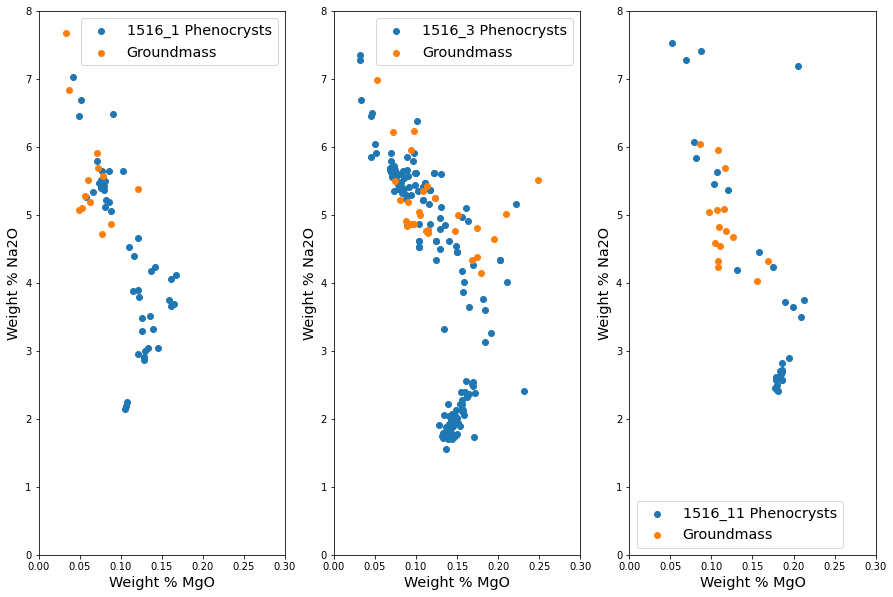

In [51]:
plt.figure(figsize=(15,10))
index=1
for i in ['1516_1','1516_3','1516_11']:
    plt.subplot(1,3,index)
    sample=all_pcrysts[all_pcrysts['Sample']==i]
    plt.scatter(sample['MgO'],sample['Na2O'],label=i+' Phenocrysts')
    
    g_sample=g_plag[g_plag['Sample']==i]
    plt.scatter(g_sample['MgO'],g_sample['Na2O'],label='Groundmass')
    
    plt.xlim(0,.3)
    plt.ylim(0,8)
    plt.xlabel('Weight % MgO',fontsize='x-large')
    plt.ylabel('Weight % Na2O',fontsize='x-large')
    plt.legend(fontsize='x-large')
    
    index+=1
